<p class="author-card" style="
    border-radius: 25px;
    overflow: hidden;
    box-shadow: 0px 4px 20px rgba(0, 0, 0, 0.1);
    border: 3px solid rgba(39, 174, 96, 0.8);
    background-color: transparent;
    padding: 30px;
    transition: transform 0.3s ease;
    font-family: Georgia;
    font-style: italic;
    font-weight: bold;
    font-size: 38px;
    text-align: center;
    background: linear-gradient(90deg, rgba(255, 0, 0, 0.8), rgba(255, 127, 0, 0.8), rgba(255, 255, 0, 0.8), rgba(0, 255, 0, 0.8), rgba(0, 255, 255, 0.8), rgba(0, 0, 255, 0.8), rgba(139, 0, 255, 0.8), rgba(255, 0, 0, 0.8));
    background-size: 200% 200%;
    -webkit-background-clip: text;
    color: transparent;
    animation: textGradient 10s linear infinite;">
    If you find my notebook helpful,<br>please consider giving an upvote.
</p>

<style>
    p.author-card:hover {
        transform: translateY(-5px);
    }
    @keyframes textGradient {
        0% { background-position: 200% 50%; }
        100% { background-position: 0% 50%; }
    }
</style>

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3168a1; overflow:hidden"><b> Academic Success Classification </b></div>

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3168a1; overflow:hidden"><b> Table of Contents </b></div>

- <a href="#1">1. import important libraries</a>
- <a href="#2">2. Data Loading and Overview</a>
- <a href="#3">3. Exploratory Data Analysis</a>
    - <a href="#Target">3.1. Target Distribution</a>  
    - <a href="#cat">3.2. Distribution of Categorical Features</a>
    - <a href="#cat_target">3.3. Distribution of Categorical Features by target</a>
    - <a href="#num">3.4. Distribution Of Numerical Features</a>    
    - <a href="#corr">3.5. Correlation Matrix</a>
    - <a href="#out">3.6. Exploring outliers</a>
    - <a href="#compare">3.7. Comparing train, test and the original data</a>
- <a href="#4">4. feature Selection</a>
- <a href="#5">5. split data into train and validation sets</a>
- <a href="#6">6. Baseline Models</a>
    - <a href="#train_actual">6.1. train models in actual data (all features)</a>
    - <a href="#feature_selection">6.2. see another techniques for feature selection</a>
    - <a href="#chi">6.3. chi squared test</a>
    - <a href="#anova">6.4. Anova test</a>     
- <a href="#7">7. Hyper parameter tuning</a>
    - <a href="#random">7.1. Random Forest</a>
    - <a href="#xgb">7.2. XGBoost</a>
    - <a href="#light">7.3. Lightgbm</a>
    - <a href="#catboost">7.4. CatBoost</a>
    - <a href="#voting">7.5. Voting</a>
    

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3168a1;overflow:hidden"><b>1. import important libraries</b></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(context = 'notebook', palette = 'pastel', style = 'whitegrid')
import warnings
warnings.simplefilter('ignore')
from scipy import stats
import time
from IPython.display import display, HTML

<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3168a1;overflow:hidden"><b>2. Data Loading and Overview</b></div>

In [2]:
train = pd.read_csv('/content/drive/MyDrive/Classification with an Academic Success Dataset/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Classification with an Academic Success Dataset/test.csv')
original_data = pd.read_csv('/content/drive/MyDrive/Classification with an Academic Success Dataset/data.csv', delimiter = ';')      # from uci machine learning repository
train.head()

id  Marital status  Application mode  Application order  Course  \
0   0               1                 1                  1    9238   
1   1               1                17                  1    9238   
2   2               1                17                  2    9254   
3   3               1                 1                  3    9500   
4   4               1                 1                  2    9500   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           1                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  ...  \
0                           126.0            1                       1  ...   
1                           125.0            1                      19  ...   
2                           137.0            1                       3  ...   
3                           131.0            1                      19  ...   
4                           132.0            1                      19  ...   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    6   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    8   
4                                    0                                    7   

   Curricular units 2nd sem (evaluations)  \
0                                       7   
1                                       9   
2                                       0   
3                                      11   
4                                      12   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    6                         12.428571   
1                                    0                          0.000000   
2                                    0                          0.000000   
3                                    7                         12.820000   
4                                    6                         12.933333   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               11.1   
1                                               0               11.1   
2                                               0               16.2   
3                                               0               11.1   
4                                               0                7.6   

   Inflation rate   GDP    Target  
0             0.6  2.02  Graduate  
1             0.6  2.02   Dropout  
2             0.3 -0.92   Dropout  
3             0.6  2.02  Enrolled  
4             2.6  0.32  Graduate  

[5 rows x 38 columns]

In [3]:
train.shape

(76518, 38)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

In [5]:
train.isna().sum()

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular units 1st sem (credited)               0
Curricular units 1st sem (enrolled)               0
Curricular units 1st sem (evaluations)            0
Curricular units 1st sem (approved)               0
Curricular units 1st sem (grade)                  0
Curricular units 1st sem (without evaluations)    0
Curricular units 2nd sem (credited)               0
Curricular units 2nd sem (enrolled)               0
Curricular units 2nd sem (evaluations)            0
Curricular units 2nd sem (approved)               0
Curricular units 2nd sem (grade)                  0
Curricular units 2nd sem (without evaluations)    0
Unemployment rate                                 0
Inflation rate                                    0
GDP                                               0
Target                                            0
dtype: int64

In [6]:
train.duplicated().sum()

0

- No duplicates and no missing values.

In [7]:
# separate the features columns
features_list = train.columns.to_list()[:-1]
len(features_list)

37

In [8]:
for i in train.columns[:-1]:
  print(i, train[i].nunique())

id 76518
Marital status 6
Application mode 22
Application order 8
Course 19
Daytime/evening attendance 2
Previous qualification 21
Previous qualification (grade) 110
Nacionality 18
Mother's qualification 35
Father's qualification 39
Mother's occupation 40
Father's occupation 56
Admission grade 668
Displaced 2
Educational special needs 2
Debtor 2
Tuition fees up to date 2
Gender 2
Scholarship holder 2
Age at enrollment 46
International 2
Curricular units 1st sem (credited) 21
Curricular units 1st sem (enrolled) 24
Curricular units 1st sem (evaluations) 36
Curricular units 1st sem (approved) 23
Curricular units 1st sem (grade) 1206
Curricular units 1st sem (without evaluations) 12
Curricular units 2nd sem (credited) 20
Curricular units 2nd sem (enrolled) 22
Curricular units 2nd sem (evaluations) 31
Curricular units 2nd sem (approved) 21
Curricular units 2nd sem (grade) 1234
Curricular units 2nd sem (without evaluations) 11
Unemployment rate 11
Inflation rate 13
GDP 11


In [9]:
# categorical features
cat_features = [col for col in train.columns if train[col].nunique() <= 8]

# numerical features
num_features = train.columns.to_list()
for cat in cat_features:
  num_features.remove(cat)


In [10]:
cat_features.remove('Target')

In [11]:
len(cat_features), len(num_features)

(10, 27)

In [12]:
num_features.remove('id')

In [13]:
# Function to create a scrollable table within a small window
def scrollable_table(data, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:200px; overflow:auto;">'
    html += data.to_html()
    html += '</div>'
    return html

In [14]:
# Summary statistics for numerical features
summary_stats = train[num_features].describe().T
html_numerical = scrollable_table(summary_stats, 'numerical_features', 'Summary statistics for numerical features')

display(HTML(html_numerical))

In [15]:
# Summary statistics for categorical features
cat_summary_stats = train[cat_features].describe().T
html_categorical = scrollable_table(cat_summary_stats, 'categorical_features', 'Summary statistics for categorical features')

display(HTML(html_categorical ))

In [16]:
# Summary statistics for target feature
train['Target'].describe().T

count        76518
unique           3
top       Graduate
freq         36282
Name: Target, dtype: object

<a id="3"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3168a1;overflow:hidden"><b>3. Exploratory Data Analysis</b></div>

<a id='Target'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#3168a1; overflow:hidden"><b> 3.1. Target Distribution  </b></div>

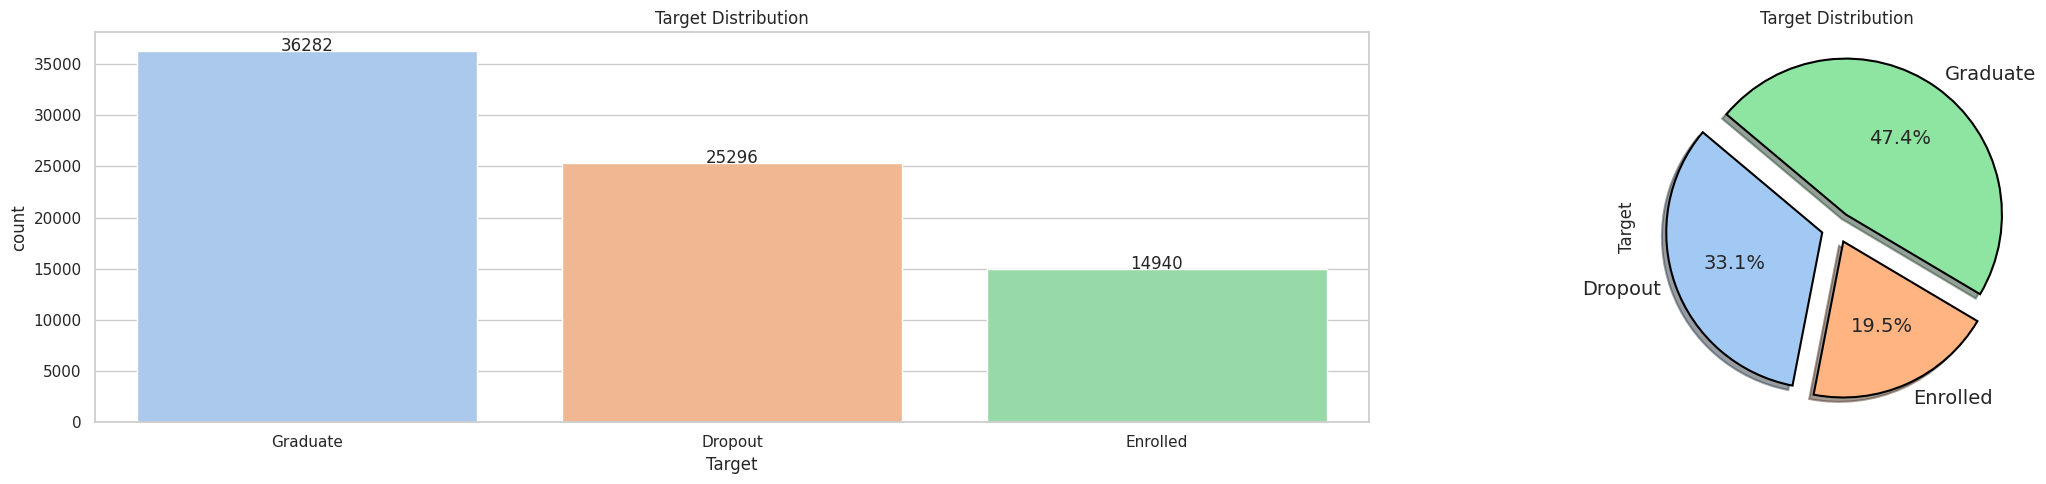

In [17]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(25, 5))
sns.countplot(x='Target', data=train, palette='pastel', ax = axes[0])

# Add labels to each bar in the plot
for p in axes[0].patches:
    axes[0].text(p.get_x() + p.get_width() / 2, p.get_height() + 3, f'{int(p.get_height())}', ha="center")
axes[0].set_title('Target Distribution')

palette_color = sns.color_palette('pastel')
explode = [0.1 for _ in range(train['Target'].nunique())]

# Plotting
train.groupby('Target')['Target'].count().plot.pie(
    colors=palette_color,
    explode=explode,
    autopct="%1.1f%%",
    shadow=True,  # Adding shadow for better visibility
    startangle=140,  # Start angle for better alignment
    textprops={'fontsize': 14},  # Adjust text size
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}, # Adding edge color and width
    ax = axes[1]
)

# Adding a title
axes[1].set_title('Target Distribution')

# Equal aspect ratio ensures that pie is drawn as a circle.
# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()



<a id='cat'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#3168a1; overflow:hidden"><b> 3.2. Distribution of Categorical Features  </b></div>

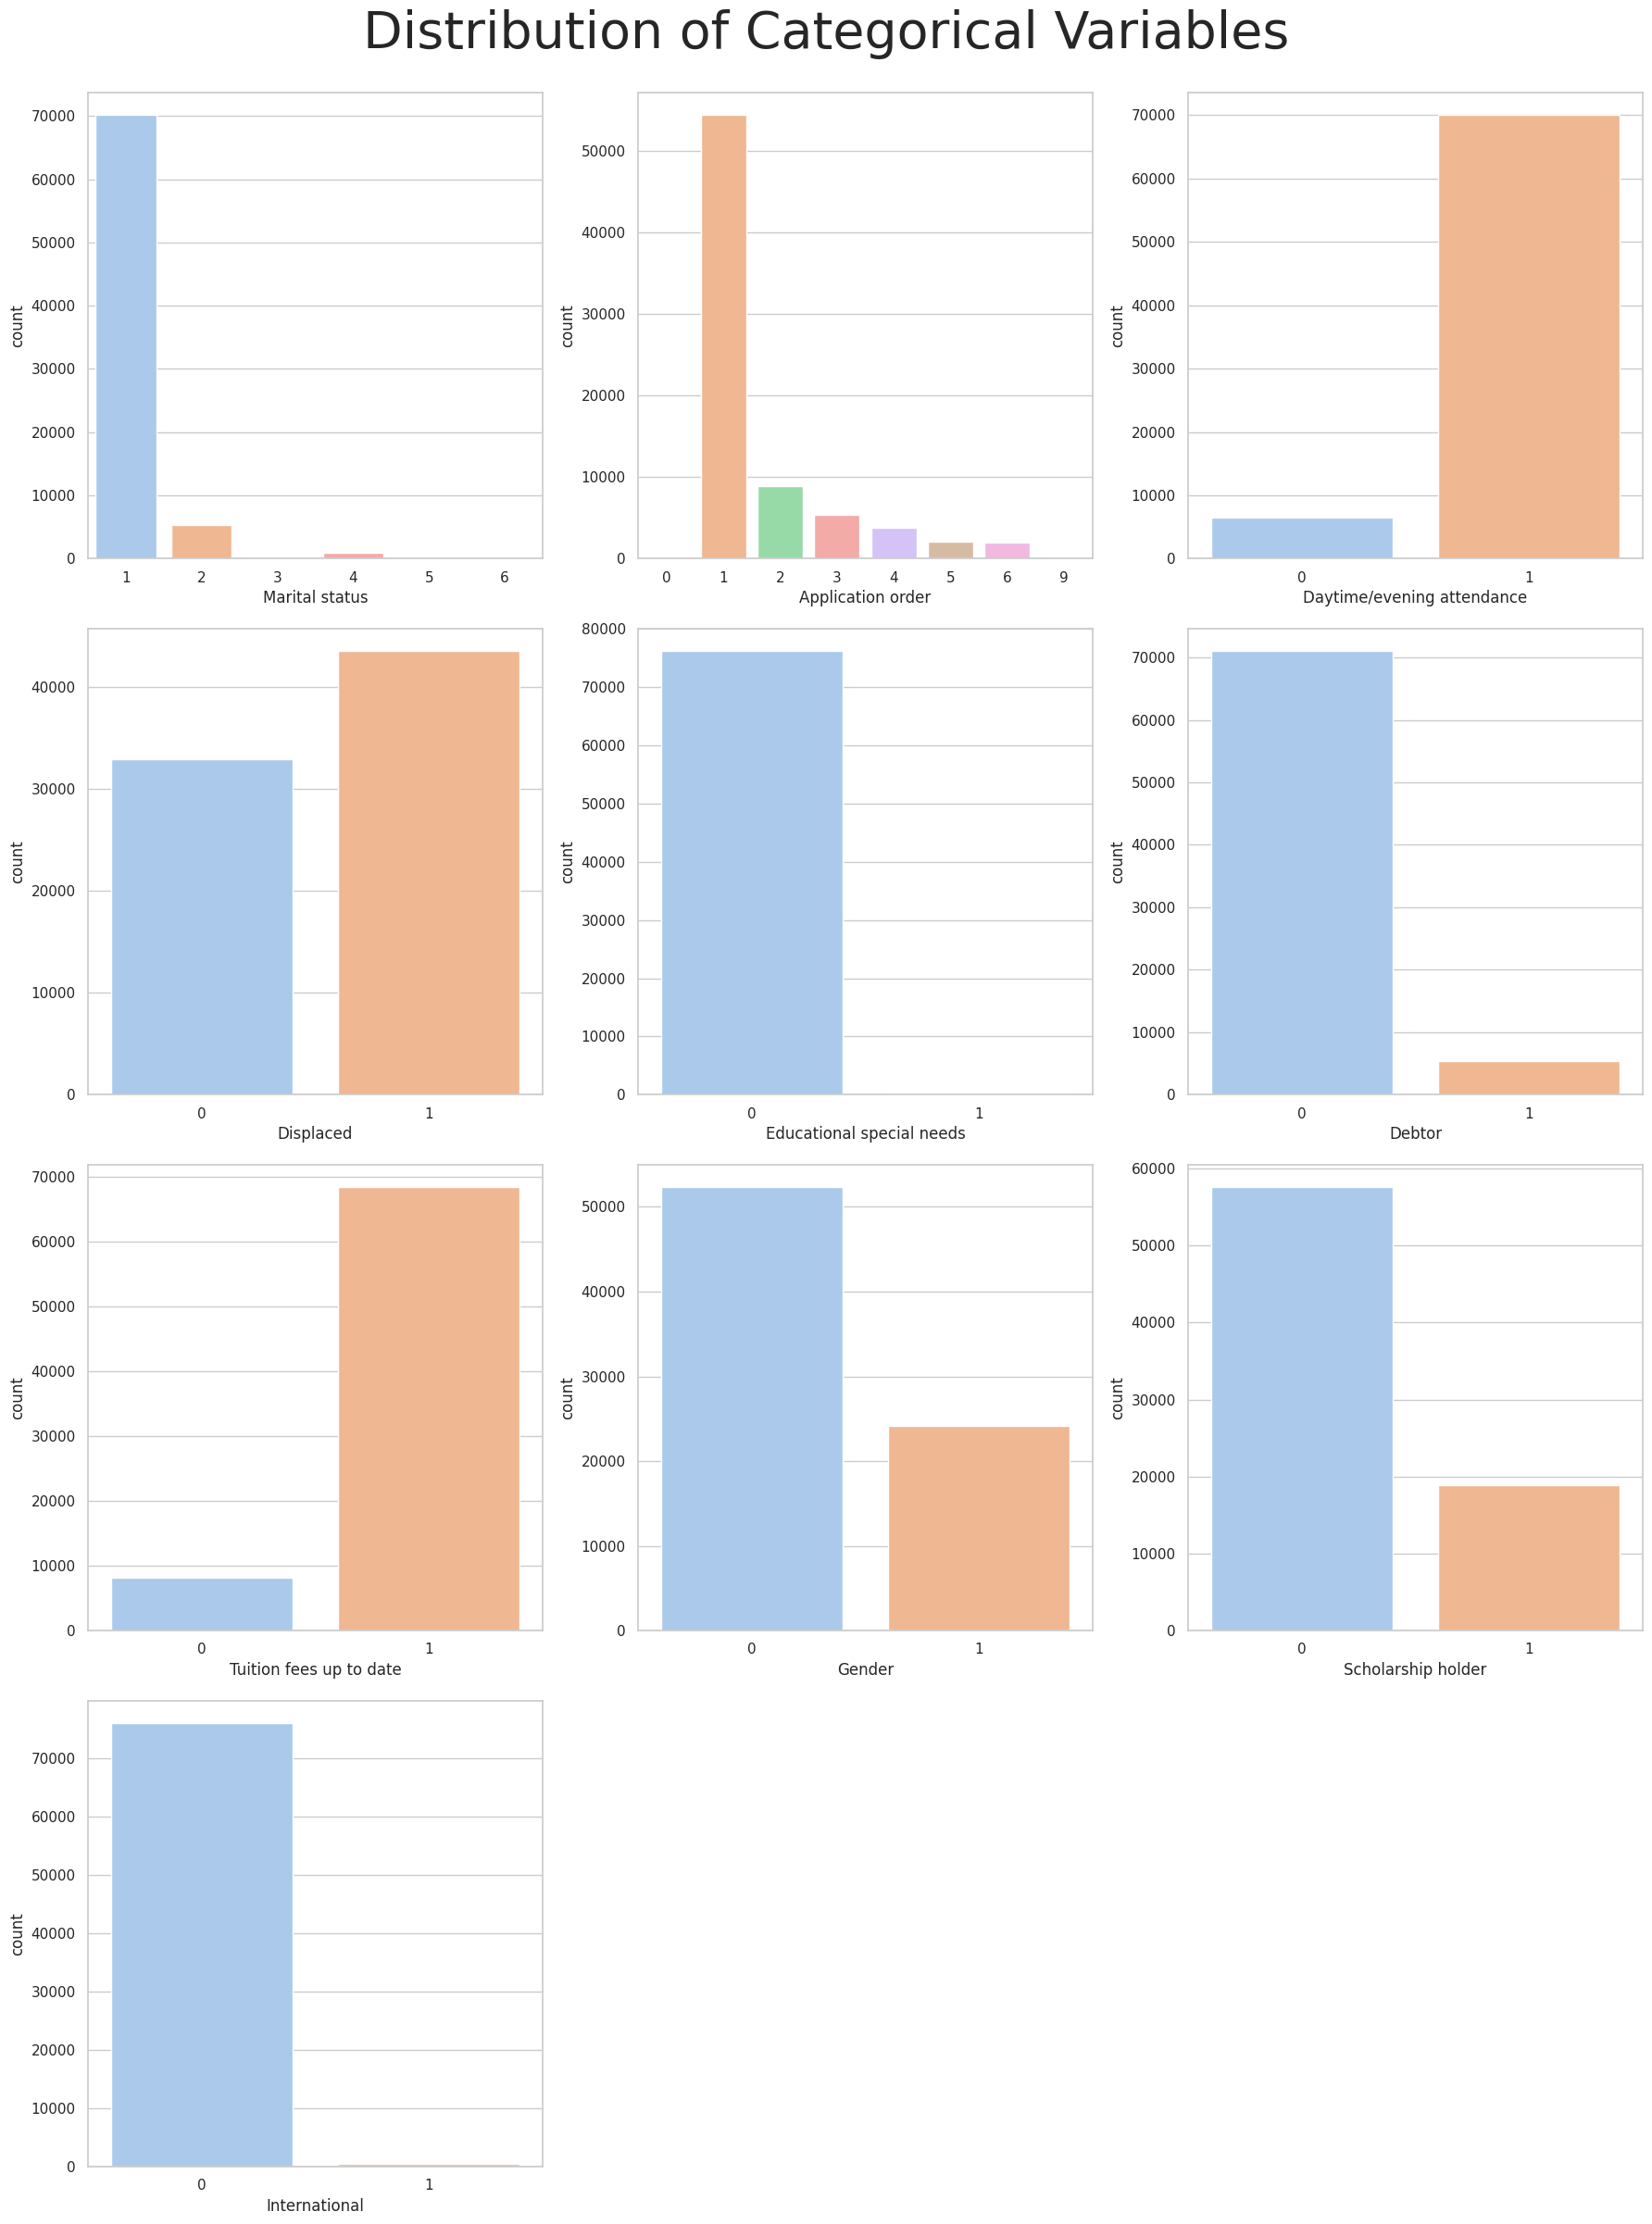

In [18]:
# Distribution of categorical variables
plt.figure(figsize=(18, 24))
plotnumber = 1

for col in cat_features:
    if plotnumber <= len(cat_features):
        ax = plt.subplot(4, 3, plotnumber)
        sns.countplot(x = train[col], data = train, palette = 'pastel')

        # Add labels to each bar in the plot
        # for p in ax.patches:
        #     ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 3, f'{int(p.get_height())}', ha="center")

        plt.xlabel(col)
        plt.xlabel(col)

    plotnumber += 1

plt.suptitle('Distribution of Categorical Variables', fontsize = 40, y = 1)
plt.tight_layout()
plt.show()

<a id='cat_target'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#3168a1; overflow:hidden"><b> 3.3. Distribution of Categorical Features by target </b></div>

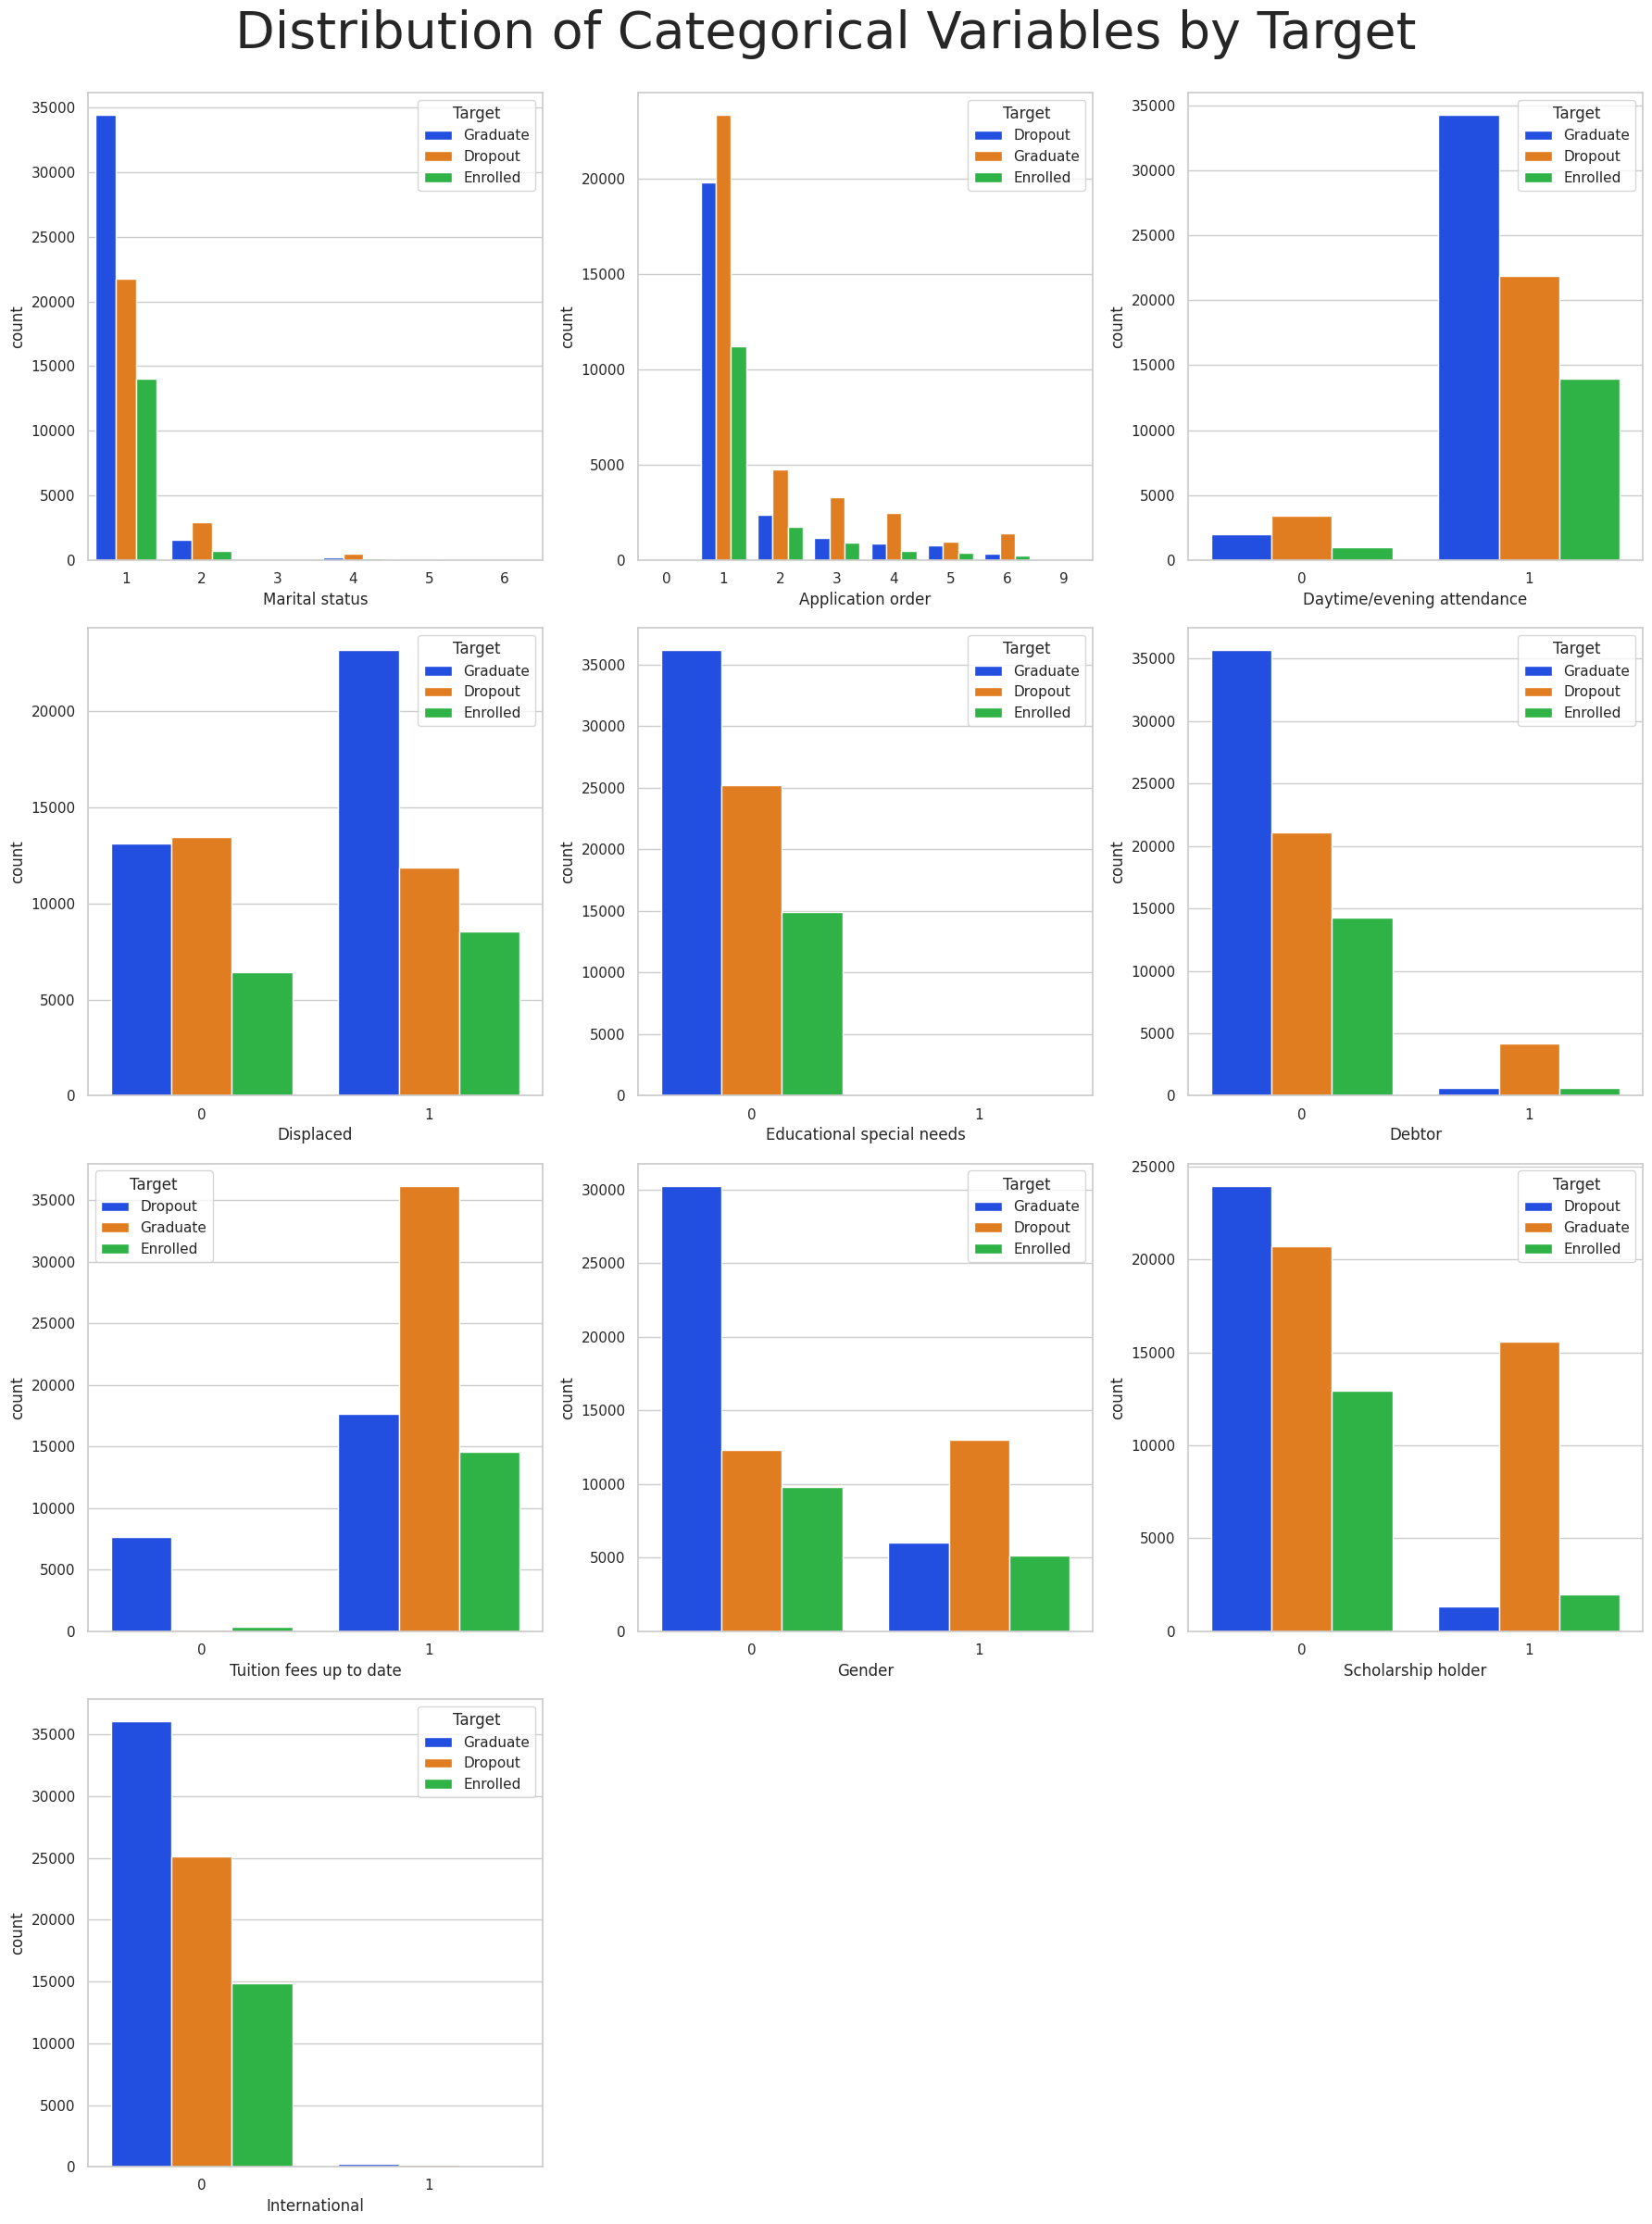

In [19]:
plt.figure(figsize=(18, 24))
plotnumber = 1

# Loop through each column
for col in cat_features:
    if plotnumber <= len(cat_features):
        plt.subplot(4, 3, plotnumber)
        ax = sns.countplot(x = train[col], hue = train['Target'], palette = 'bright')

    plotnumber += 1

plt.suptitle('Distribution of Categorical Variables by Target', fontsize = 40, y = 1)
plt.tight_layout()
plt.show()

<a id='num'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#3168a1; overflow:hidden"><b> 3.4. Distribution Of Numerical Features  </b></div>

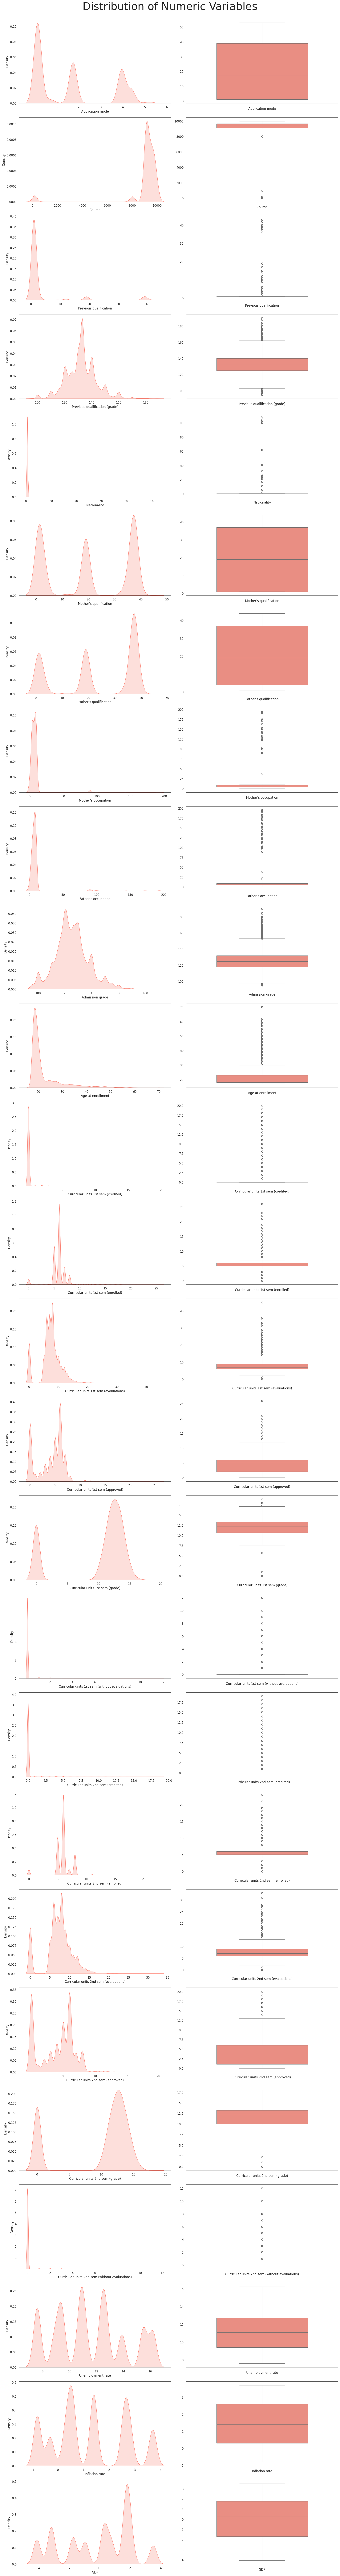

In [20]:
plt.figure(figsize=(18, 135))
plotnumber = 1

for col in num_features:
    if plotnumber <= len(num_features):

        ax1 = plt.subplot(len(num_features), 2, 2 * plotnumber - 1)
        sns.kdeplot(train[col], color = 'salmon', fill = True)
        for spine in ax1.spines.values():
            spine.set_visible(True)
            spine.set_color('black')
            spine.set_linewidth(0.5)
        ax1.set_xlabel(col)
        ax1.grid(False)

        ax2 = plt.subplot(len(num_features), 2, 2 * plotnumber)
        sns.boxplot(y = train[col], color = 'salmon', width = 0.6, linewidth = 1)
        for spine in ax2.spines.values():
            spine.set_visible(True)
            spine.set_color('black')
            spine.set_linewidth(0.5)
        ax2.set_xlabel(col)
        ax2.set_ylabel('')
        ax2.grid(False)

    plotnumber += 1

plt.suptitle('Distribution of Numeric Variables', fontsize = 40, y = 1)
plt.tight_layout()
plt.show()

<a id='corr'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#3168a1; overflow:hidden"><b> 3.5. Correlation Matrix  </b></div>

In [21]:
# encoding label
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
train['Target'] = encode.fit_transform(train['Target'])

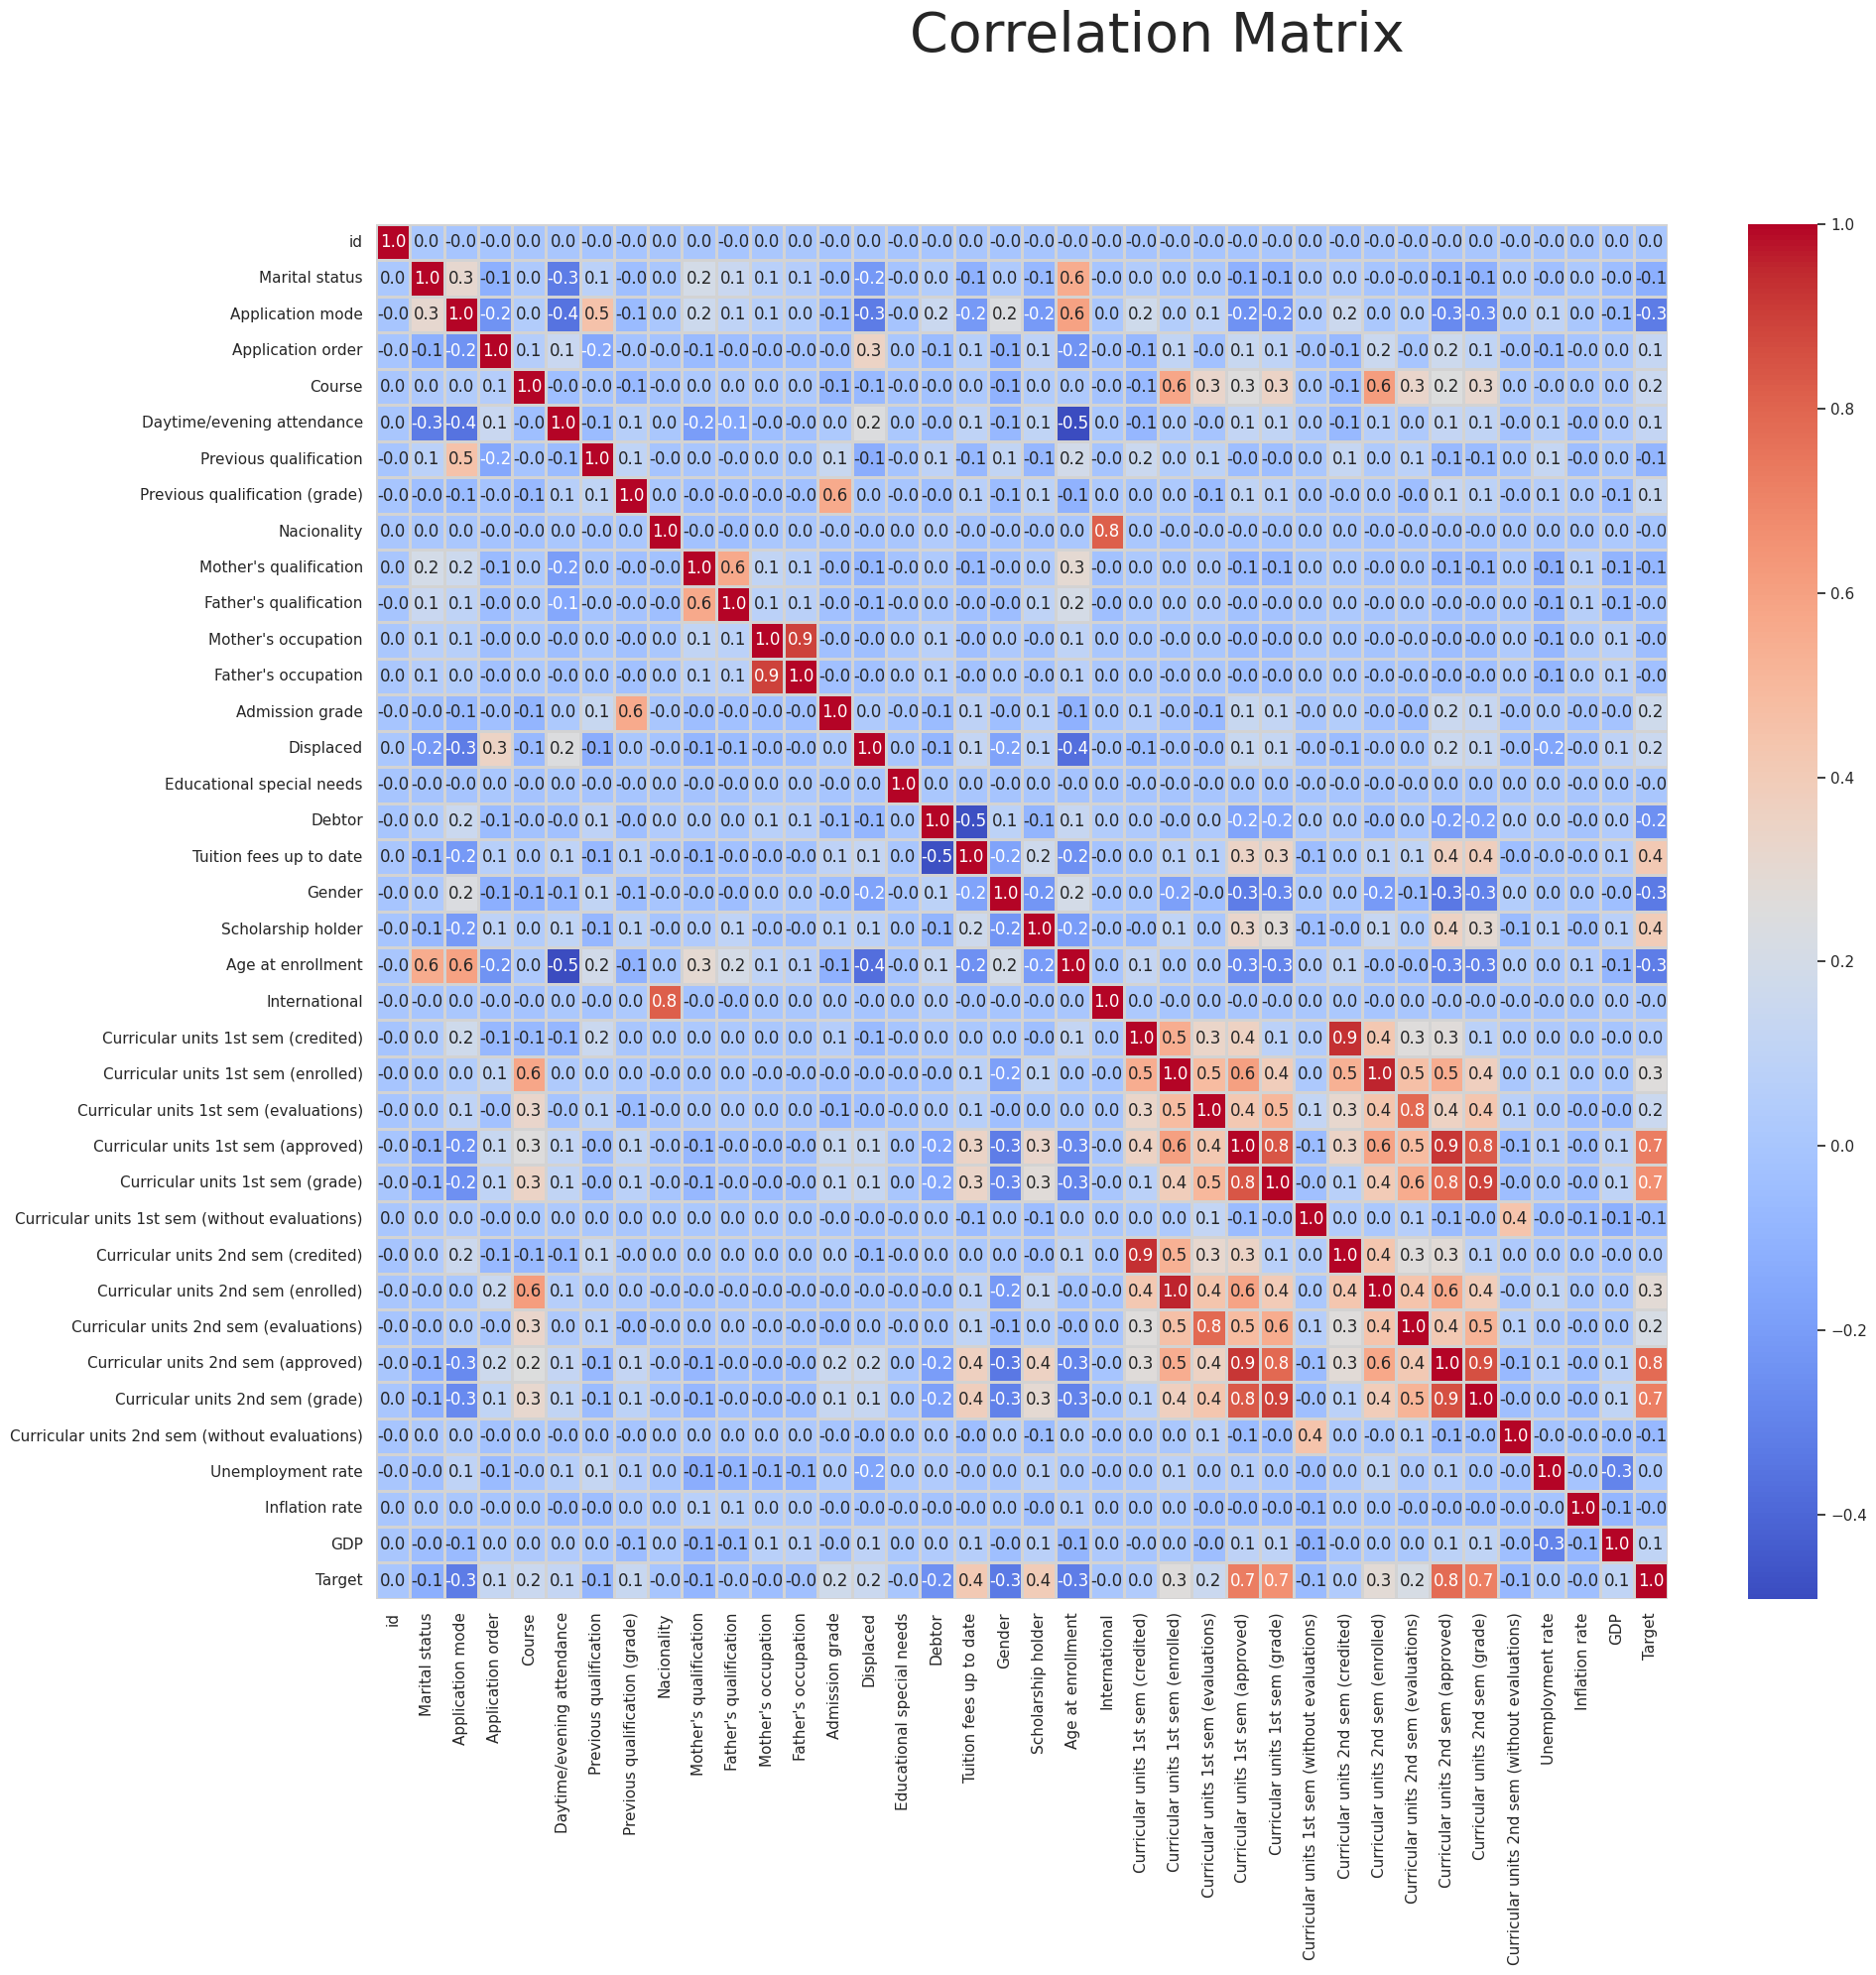

In [22]:
# Correlation matrix
plt.figure(figsize = (21, 18))
sns.heatmap(train.corr(), annot = True, cmap = 'coolwarm', fmt = '.1f', linewidths = 2, linecolor = 'lightgrey')
plt.suptitle('Correlation Matrix', fontsize = 40, y = 1)
plt.show()

<a id='out'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#3168a1; overflow:hidden"><b> 3.6. Exploring outliers  </b></div>

In [23]:
# Calculate the Z-scores for the numerical columns in the DataFrame
z_scores = stats.zscore(train[num_features])

# Generate descriptive statistics for the Z-scores and round the results to 3 decimal places
z_scores.describe().round(3)

Application mode     Course  Previous qualification  \
count         76518.000  76518.000               76518.000   
mean             -0.000      0.000                   0.000   
std               1.000      1.000                   1.000   
min              -0.902     -4.973                  -0.308   
25%              -0.902      0.065                  -0.308   
50%               0.057      0.140                  -0.308   
75%               1.375      0.371                  -0.308   
max               2.215      0.549                   4.562   

       Previous qualification (grade)  Nacionality  Mother's qualification  \
count                       76518.000    76518.000               76518.000   
mean                            0.000        0.000                  -0.000   
std                             1.000        1.000                   1.000   
min                            -3.400       -0.067                  -1.223   
25%                            -0.671       -0.067                  -1.223   
50%                             0.066       -0.067                  -0.054   
75%                             0.693       -0.067                   1.114   
max                             5.241       31.771                   1.569   

       Father's qualification  Mother's occupation  Father's occupation  \
count               76518.000            76518.000            76518.000   
mean                    0.000               -0.000               -0.000   
std                     1.000                1.000                1.000   
min                    -1.503               -0.491               -0.529   
25%                    -1.302               -0.262               -0.231   
50%                    -0.297               -0.091               -0.112   
75%                     0.910                0.024                0.007   
max                     1.379               10.613               11.076   

       Admission grade  ...  Curricular units 1st sem (without evaluations)  \
count        76518.000  ...                                       76518.000   
mean             0.000  ...                                          -0.000   
std              1.000  ...                                           1.000   
min             -2.417  ...                                          -0.142   
25%             -0.586  ...                                          -0.142   
50%             -0.061  ...                                          -0.142   
75%              0.528  ...                                          -0.142   
max              5.145  ...                                          29.235   

       Curricular units 2nd sem (credited)  \
count                            76518.000   
mean                                 0.000   
std                                  1.000   
min                                 -0.147   
25%                                 -0.147   
50%                                 -0.147   
75%                                 -0.147   
max                                 20.200   

       Curricular units 2nd sem (enrolled)  \
count                            76518.000   
mean                                -0.000   
std                                  1.000   
min                                 -3.646   
25%                                 -0.574   
50%                                  0.041   
75%                                  0.041   
max                                 10.488   

       Curricular units 2nd sem (evaluations)  \
count                               76518.000   
mean                                   -0.000   
std                                     1.000   
min                                    -2.065   
25%                                    -0.352   
50%                                    -0.067   
75%                                     0.504   
max                                     7.355   

       Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
count

<a id='compare'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#3168a1; overflow:hidden"><b> 3.7. Comparing train, test and the original data  </b></div>

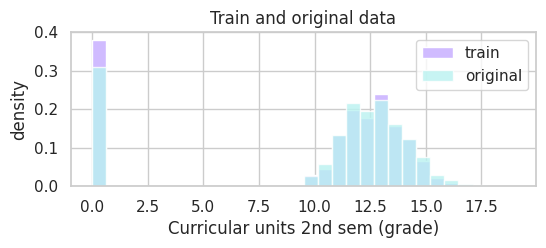

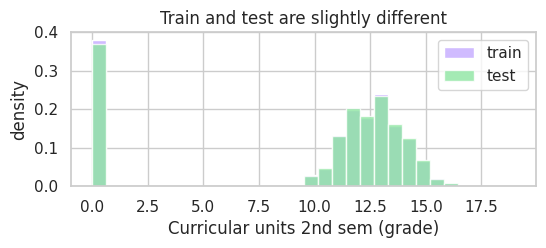

In [24]:
plt.figure(figsize=(6, 2))
plt.hist(train['Curricular units 2nd sem (grade)'],
         bins = np.linspace(0, 19, 31),
         density = True,
         color = 'm',
         label = 'train')
plt.hist(original_data['Curricular units 2nd sem (grade)'],
         bins = np.linspace(0, 19, 31),
         density = True,
         alpha = 0.8,
         color = 'c',
         label = 'original')
plt.xlabel('Curricular units 2nd sem (grade)')
plt.ylabel('density')
plt.title('Train and original data')
plt.legend()
plt.show()

plt.figure(figsize=(6, 2))
plt.hist(train['Curricular units 2nd sem (grade)'],
         bins = np.linspace(0, 19, 31),
         density = True,
         color = 'm',
         label = 'train')
plt.hist(test['Curricular units 2nd sem (grade)'],
         bins = np.linspace(0, 19, 31),
         density = True,
         alpha = 0.8,
         color = 'g',
         label = 'test')
plt.xlabel('Curricular units 2nd sem (grade)')
plt.ylabel('density')
plt.title('Train and test are slightly different')
plt.legend()
plt.show()

In [25]:
from scipy.stats import mannwhitneyu

print('Mann–Whitney U test comparing train and original datasets')
print(mannwhitneyu(train['Curricular units 2nd sem (grade)'],
                   original_data['Curricular units 2nd sem (grade)']))

print('\nMann–Whitney U test comparing train and test datasets')
print(mannwhitneyu(train['Curricular units 2nd sem (grade)'],
                   test['Curricular units 2nd sem (grade)']))


Mann–Whitney U test comparing train and original datasets
MannwhitneyuResult(statistic=160945414.5, pvalue=3.0285691238655233e-08)

Mann–Whitney U test comparing train and test datasets
MannwhitneyuResult(statistic=1939815047.0, pvalue=0.06384029023546983)


More formally, we can compare the distributions with a [Mann–Whitney U test](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test). The low pvalue for the original dataset indicates that the distributions are different. The pvalue for the test dataset is 0.06, which means we shouldn't reject the null hypothesis that the train and test distributions are the same.

    Although the distributions of train and original differ significantly, adding the original dataset to the training dataset improves the score

<a id="4"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3168a1;overflow:hidden"><b>4. feature Selection</b></div>

In [26]:
# Calculate the correlation matrix
corr_matrix = train.corr()

# Get the absolute correlations with the target variable
correlations_with_target = abs(corr_matrix['Target'])

# Select features with correlation less than 0.1
features_to_remove = correlations_with_target[correlations_with_target < 0.1].index.tolist()

# Remove the low-correlation features from the training set
train_filtered = train.drop(columns=features_to_remove)

# Display the first few rows of the filtered DataFrame
train_filtered.head()

Marital status  Application mode  Application order  Course  \
0               1                 1                  1    9238   
1               1                17                  1    9238   
2               1                17                  2    9254   
3               1                 1                  3    9500   
4               1                 1                  2    9500   

   Daytime/evening attendance  Previous qualification (grade)  \
0                           1                           126.0   
1                           1                           125.0   
2                           1                           137.0   
3                           1                           131.0   
4                           1                           132.0   

   Admission grade  Displaced  Debtor  Tuition fees up to date  ...  \
0            122.6          0       0                        1  ...   
1            119.8          1       0                        1  ...   
2            144.7          0       0                        1  ...   
3            126.1          1       0                        1  ...   
4            120.1          1       0                        1  ...   

   Curricular units 1st sem (enrolled)  \
0                                    6   
1                                    6   
2                                    6   
3                                    7   
4                                    7   

   Curricular units 1st sem (evaluations)  \
0                                       6   
1                                       8   
2                                       0   
3                                       9   
4                                      12   

   Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
0                                    6                         14.500000   
1                                    4                         11.600000   
2                                    0                          0.000000   
3                                    7                         12.591250   
4                                    6                         12.933333   

   Curricular units 2nd sem (enrolled)  \
0                                    6   
1                                    6   
2                                    6   
3                                    8   
4                                    7   

   Curricular units 2nd sem (evaluations)  \
0                                       7   
1                                       9   
2                                       0   
3                                      11   
4                                      12   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    6                         12.428571   
1                                    0                          0.000000   
2                                    0                          0.000000   
3                                    7                         12.820000   
4                                    6                         12.933333   

    GDP  Target  
0  2.02       2  
1  2.02       0  
2 -0.92       0  
3  2.02       1  
4  0.32       2  

[5 rows x 23 columns]

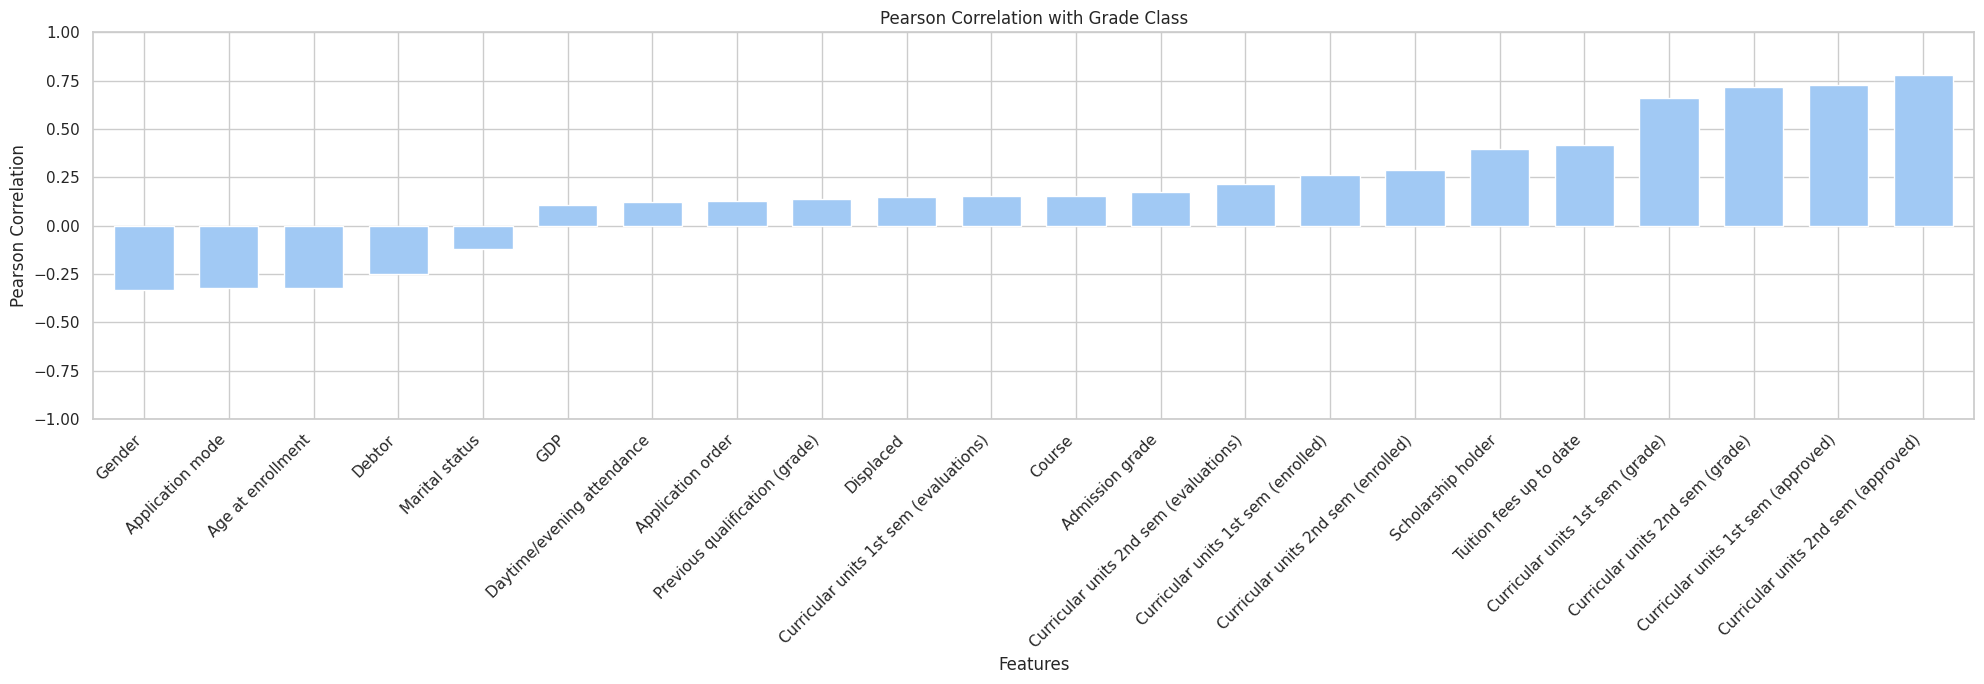

In [27]:
correlations = train_filtered.corr(numeric_only = True)['Target'][: -1].sort_values()

plt.figure(figsize=(20, 7))

ax = correlations.plot(kind = 'bar', width = 0.7)

ax.set(ylim = [-1, 1], ylabel = 'Pearson Correlation', xlabel = 'Features',
       title = 'Pearson Correlation with Grade Class')

ax.set_xticklabels(correlations.index, rotation = 45, ha = 'right')

plt.tight_layout()
plt.show()

<a id="5"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3168a1;overflow:hidden"><b>5. split data into train and validation sets</b></div>

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train.drop('Target', axis = 1), train['Target'], test_size = 0.1, random_state = 0)
x_train.shape, x_val.shape

((68866, 37), (7652, 37))

<a id="6"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3168a1;overflow:hidden"><b>6. Baseline Models</b></div>

In [31]:
# Instantiate classification models with default parameters
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Create a dictionary of classification models
models = {
    'Decision Tree': DecisionTreeClassifier,
    'Gradient Boosting': GradientBoostingClassifier,
    'AdaBoost': AdaBoostClassifier,
    'XGBoost': XGBClassifier,
    'LightGBM': LGBMClassifier,
    'CatBoost': CatBoostClassifier
}

In [32]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def cross_validate_model(model, X_train, y_train, params, n_splits = 10):
    """
    Performs K-Fold cross-validation for a given model, returns the last model and average validation accuracy.

    Parameters:
        model: Machine learning model class (e.g., RandomForestClassifier)
        X_train: Training feature dataset
        y_train: Training target dataset
        params: Dictionary of parameters to initialize the model
        n_splits: Number of folds for cross-validation (default: 10)

    Returns:
        last_model: The last trained model instance
        average_val_accuracy: Average validation accuracy over all folds
    """
    # Initialize variables
    cv = KFold(n_splits = n_splits, shuffle = True, random_state = 0)
    val_scores = []

    # Cross-validation loop
    for fold, (train_ind, valid_ind) in enumerate(cv.split(X_train)):
        # Data splitting
        X_fold_train = X_train.iloc[train_ind]
        y_fold_train = y_train.iloc[train_ind]
        X_val = X_train.iloc[valid_ind]
        y_val = y_train.iloc[valid_ind]

        # Model initialization and training
        clf = model(**params)
        clf.fit(X_fold_train, y_fold_train)

        # Predict and evaluate
        y_pred_trn = clf.predict(X_fold_train)
        y_pred_val = clf.predict(X_val)
        train_acc = accuracy_score(y_fold_train, y_pred_trn)
        val_acc = accuracy_score(y_val, y_pred_val)
        print(f"Fold: {fold}, Train Accuracy: {train_acc:.5f}, Val Accuracy: {val_acc:.5f}")
        print("-" * 50)

        # Accumulate validation scores
        val_scores.append(val_acc)

    # Calculate the average validation score
    average_val_accuracy = np.mean(val_scores)
    print("Average Validation Accuracy:", average_val_accuracy)
    print('\n\n')

    return clf, average_val_accuracy

<a id='train_actual'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#3168a1; overflow:hidden"><b> 6.1. train models in actual data (all features)  </b></div>

Streaming output truncated to the last 5000 lines.
18:	learn: 0.5278382	total: 1.81s	remaining: 1m 33s
19:	learn: 0.5225996	total: 1.9s	remaining: 1m 32s
20:	learn: 0.5173241	total: 1.99s	remaining: 1m 32s
21:	learn: 0.5123402	total: 2.1s	remaining: 1m 33s
22:	learn: 0.5088165	total: 2.19s	remaining: 1m 32s
23:	learn: 0.5045469	total: 2.28s	remaining: 1m 32s
24:	learn: 0.5006553	total: 2.39s	remaining: 1m 33s
25:	learn: 0.4974464	total: 2.49s	remaining: 1m 33s
26:	learn: 0.4949026	total: 2.55s	remaining: 1m 31s
27:	learn: 0.4918619	total: 2.6s	remaining: 1m 30s
28:	learn: 0.4893206	total: 2.66s	remaining: 1m 28s
29:	learn: 0.4867652	total: 2.71s	remaining: 1m 27s
30:	learn: 0.4849624	total: 2.75s	remaining: 1m 26s
31:	learn: 0.4828946	total: 2.8s	remaining: 1m 24s
32:	learn: 0.4812584	total: 2.86s	remaining: 1m 23s
33:	learn: 0.4796789	total: 2.9s	remaining: 1m 22s
34:	learn: 0.4779344	total: 2.95s	remaining: 1m 21s
35:	learn: 0.4764919	total: 2.99s	remaining: 1m 19s
36:	learn: 0.47495

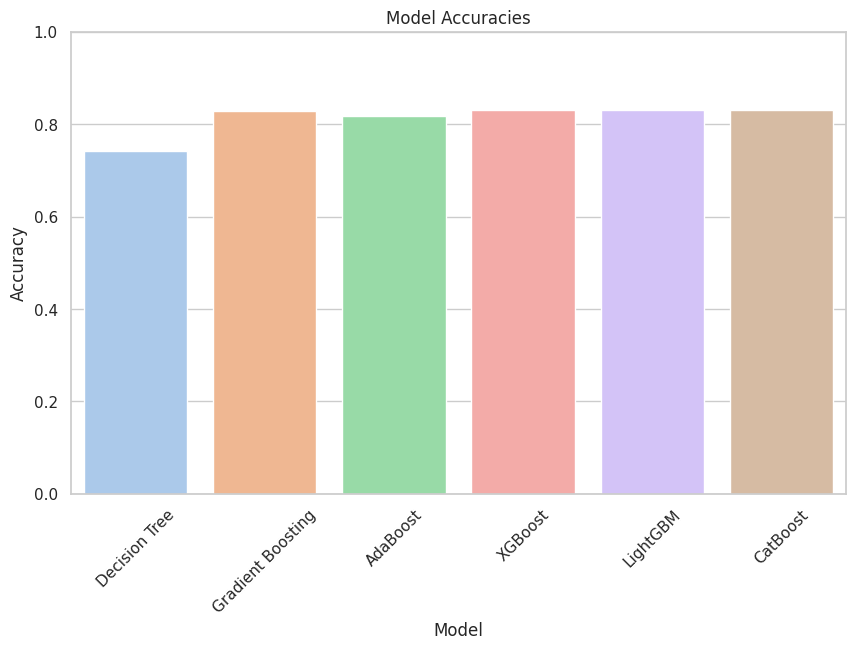

In [33]:
model_names = []
accuracies = []
trainable_models = {}

# Train and evaluate each model
for name, clf in models.items():
    print(f"Training {name}...\n")
    model, mean_accuracy = cross_validate_model(clf, x_train, y_train, params = {})

    model_names.append(name)
    accuracies.append(mean_accuracy)
    trainable_models[name] = model

# Create a DataFrame for model accuracies
df_models = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})

# Plot model accuracies using Seaborn
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Model', y = 'Accuracy', data = df_models, palette = 'pastel')
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation = 45)
plt.show()

<a id='feature_selection'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#3168a1; overflow:hidden"><b> 6.2. see another techniques for feature selection  </b></div>

In [35]:
x_train_filtered, x_test_filtered, y_train, y_val = train_test_split(train_filtered.drop('Target', axis = 1), train_filtered['Target'], test_size = 0.1, random_state = 0)
x_train_filtered.shape, x_test_filtered.shape

((68866, 22), (7652, 22))

<a id='chi'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#3168a1; overflow:hidden"><b> 6.3. chi squared test  </b></div>

In [44]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

select_feature = SelectKBest(chi2, k = 'all').fit(x_train[cat_features], y_train)

feature_score = pd.DataFrame(data = select_feature.scores_, index = list(x_train[cat_features].columns), columns = ['Chi Squared Score'])
feature_score.sort_values(ascending = False, by = 'Chi Squared Score')

Chi Squared Score
Scholarship holder                8569.414005
Gender                            5103.745615
Debtor                            4368.042878
Tuition fees up to date           1473.791442
Application order                 1147.302183
Displaced                          675.428252
Marital status                     198.719459
Daytime/evening attendance         100.371389
International                        1.048389
Educational special needs            0.651551

<a id='anova'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#3168a1; overflow:hidden"><b> 6.4. Anova test  </b></div>

In [54]:
from sklearn.feature_selection import f_classif

negative_features = [col for col in x_train[num_features] if x_train[num_features][col].min() < 0]
for i in negative_features:
  num_features.remove(i)

select_feature = SelectKBest(f_classif, k = 'all').fit(x_train[num_features], y_train)

feature_score = pd.DataFrame(data = select_feature.scores_, index = list(x_train[num_features].columns),
                             columns = ['Anova score'])
feature_score.sort_values(ascending = False, by = 'Anova score')

Anova score
Curricular units 2nd sem (evaluations)          4967.010491
Age at enrollment                               4325.164362
Application mode                                4136.271934
Curricular units 2nd sem (enrolled)             3170.694936
Curricular units 1st sem (evaluations)          3146.088046
Curricular units 1st sem (enrolled)             2565.347037
Admission grade                                 1177.565073
Course                                           962.466876
Previous qualification (grade)                   919.130085
Mother's qualification                           339.986664
Previous qualification                           301.538698
Curricular units 2nd sem (without evaluations)   210.087177
Curricular units 1st sem (without evaluations)   135.804346
Unemployment rate                                134.132358
Mother's occupation                               72.657796
Curricular units 2nd sem (credited)               61.775094
Curricular units 1st sem (credited)               51.823886
Father's occupation                               42.145159
Father's qualification                             9.920722
Nacionality                                        0.477005

In [56]:
# run best models after some of feature selection to see the diffrence
best_models = {
    'Gradient Boosting': GradientBoostingClassifier,
    'AdaBoost': AdaBoostClassifier,
    'XGBoost': XGBClassifier,
    'LightGBM': LGBMClassifier,
    'CatBoost': CatBoostClassifier
}

# Train and evaluate each model
for name, clf in best_models.items():
    print(f"Training {name}...\n")
    model, mean_accuracy = cross_validate_model(clf, x_train_filtered, y_train, params = {})

    trainable_models[name] = model

Streaming output truncated to the last 5000 lines.
18:	learn: 0.5271846	total: 778ms	remaining: 40.2s
19:	learn: 0.5213889	total: 851ms	remaining: 41.7s
20:	learn: 0.5161110	total: 931ms	remaining: 43.4s
21:	learn: 0.5115415	total: 1.02s	remaining: 45.3s
22:	learn: 0.5070392	total: 1.1s	remaining: 47s
23:	learn: 0.5031624	total: 1.19s	remaining: 48.4s
24:	learn: 0.4996997	total: 1.28s	remaining: 49.9s
25:	learn: 0.4963882	total: 1.35s	remaining: 50.6s
26:	learn: 0.4935945	total: 1.43s	remaining: 51.4s
27:	learn: 0.4908930	total: 1.5s	remaining: 52.2s
28:	learn: 0.4883100	total: 1.58s	remaining: 53s
29:	learn: 0.4861331	total: 1.66s	remaining: 53.5s
30:	learn: 0.4840117	total: 1.72s	remaining: 53.9s
31:	learn: 0.4823239	total: 1.79s	remaining: 54.3s
32:	learn: 0.4806632	total: 1.87s	remaining: 54.8s
33:	learn: 0.4792110	total: 1.93s	remaining: 54.9s
34:	learn: 0.4777182	total: 1.99s	remaining: 55s
35:	learn: 0.4763363	total: 2.07s	remaining: 55.6s
36:	learn: 0.4753512	total: 2.14s	remai

<a id="7"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3168a1;overflow:hidden"><b>7. Hyper parameter tuning</b></div>

<a id='random'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#3168a1; overflow:hidden"><b> 7.1. Random Forest  </b></div>

In [ ]:
# Recursive feature elimination with cross validation and random forest classification
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf = RandomForestClassifier()
rfecv = RFECV(estimator = clf_rf, step = 1, cv = 5,scoring = 'accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train_filtered, y_train)

In [59]:
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train_filtered.columns[rfecv.support_])

Optimal number of features : 20
Best features : Index(['Application mode', 'Application order', 'Course',
       'Previous qualification (grade)', 'Admission grade', 'Displaced',
       'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)', 'GDP'],
      dtype='object')


In [60]:
x_train_filtered.shape

(68866, 22)

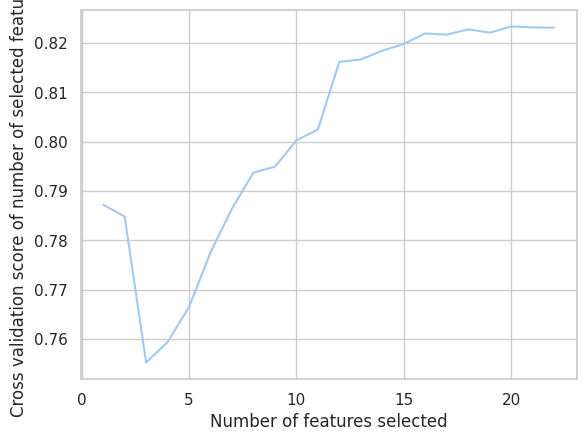

In [62]:
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

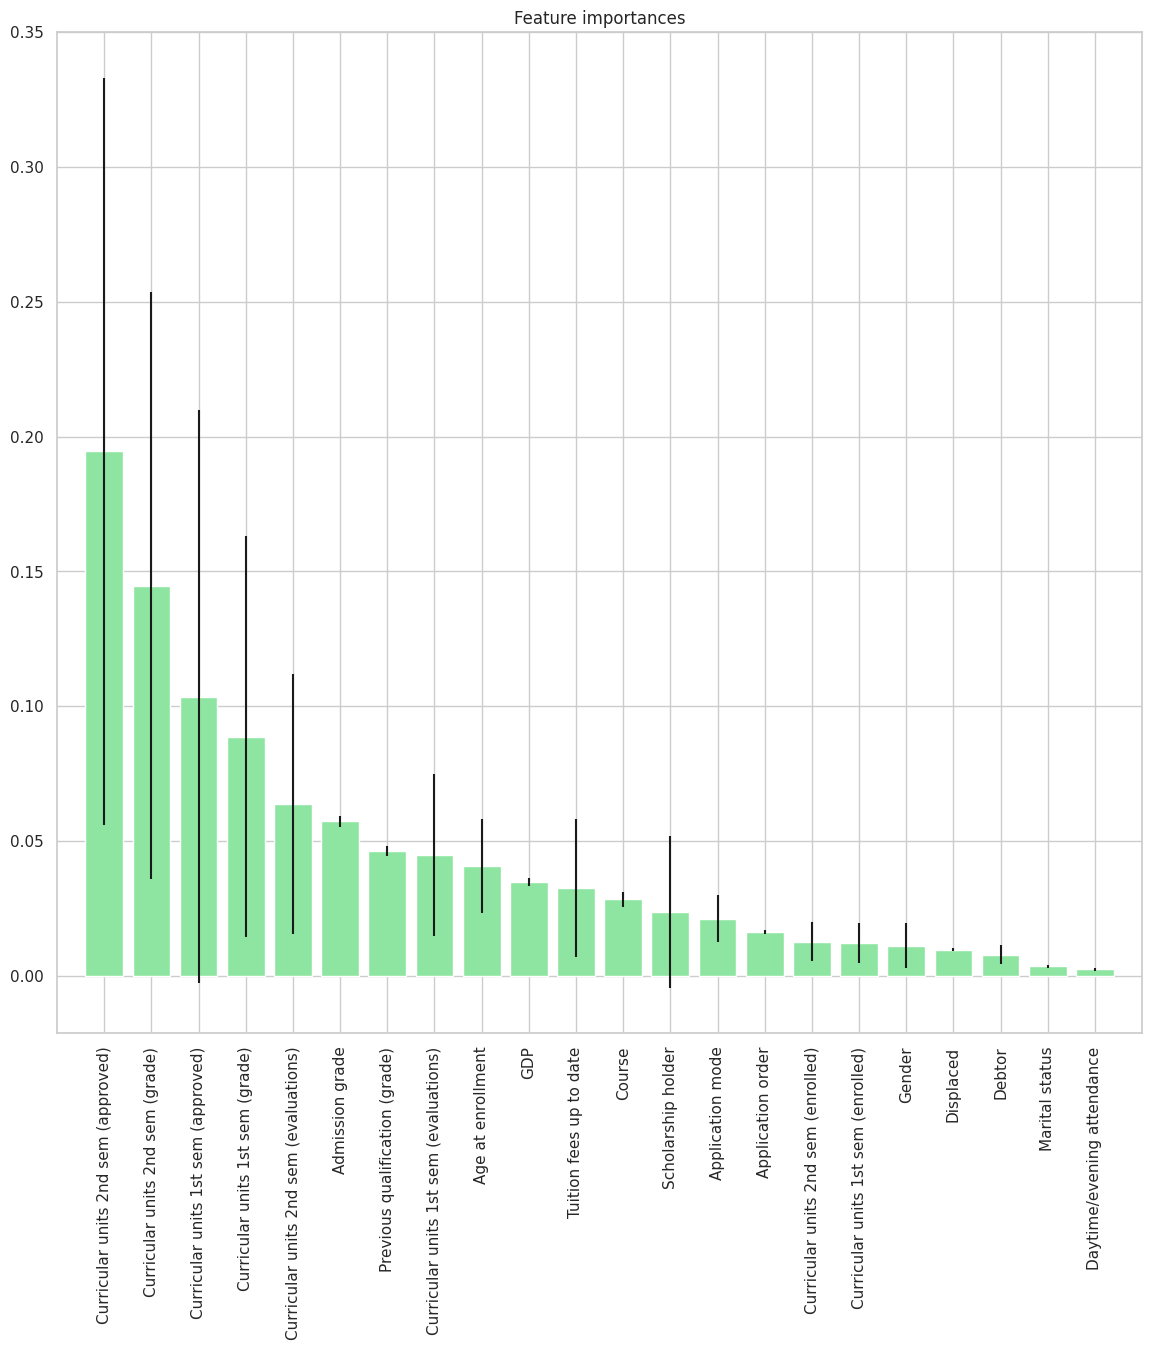

In [63]:
clf_rf = RandomForestClassifier()
clr_rf = clf_rf.fit(x_train_filtered, y_train)
importances = clr_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis = 0)
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train_filtered.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train_filtered.shape[1]), x_train_filtered.columns[indices],rotation=90)
plt.xlim([-1, x_train_filtered.shape[1]])
plt.show()

In [67]:
rf_params = {'min_samples_leaf': 2, 'max_features': 0.6678943947450321, 'min_impurity_decrease': 0.00014125090018120894,
             'max_samples': 0.8660526124724528, 'n_estimators': 400, 'criterion': 'log_loss'}
random_forest_model, random_forest_mean_accuracy = cross_validate_model(RandomForestClassifier, x_train_filtered[x_train_filtered.columns[rfecv.support_]],
                                                                        y_train, params = rf_params)

Fold: 0, Train Accuracy: 0.85708, Val Accuracy: 0.82344
--------------------------------------------------
Fold: 1, Train Accuracy: 0.85836, Val Accuracy: 0.81952
--------------------------------------------------
Fold: 2, Train Accuracy: 0.85761, Val Accuracy: 0.82387
--------------------------------------------------
Fold: 3, Train Accuracy: 0.85758, Val Accuracy: 0.82271
--------------------------------------------------
Fold: 4, Train Accuracy: 0.85627, Val Accuracy: 0.83462
--------------------------------------------------
Fold: 5, Train Accuracy: 0.85677, Val Accuracy: 0.83070
--------------------------------------------------
Fold: 6, Train Accuracy: 0.85673, Val Accuracy: 0.82370
--------------------------------------------------
Fold: 7, Train Accuracy: 0.85741, Val Accuracy: 0.82385
--------------------------------------------------
Fold: 8, Train Accuracy: 0.85797, Val Accuracy: 0.81833
--------------------------------------------------
Fold: 9, Train Accuracy: 0.85720, Val

<a id='xgb'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#3168a1; overflow:hidden"><b> 7.2. XGBoost  </b></div>

In [69]:
xgb_params = {
    'n_estimators': 929,
    'alpha': 2.287466581490129e-05,
    'subsample': 0.8766675651018592,
    'colsample_bytree': 0.288332829334817,
    'max_depth': 8,
    'min_child_weight': 6,
    'learning_rate': 0.024083411832750343,
    'gamma': 0.001816649055813574
}
xgb_model, xgb_mean_accuracy = cross_validate_model(XGBClassifier, x_train_filtered,
                                                                        y_train, params = xgb_params)

Fold: 0, Train Accuracy: 0.88133, Val Accuracy: 0.83055
--------------------------------------------------
Fold: 1, Train Accuracy: 0.88144, Val Accuracy: 0.82198
--------------------------------------------------
Fold: 2, Train Accuracy: 0.88010, Val Accuracy: 0.83215
--------------------------------------------------
Fold: 3, Train Accuracy: 0.88107, Val Accuracy: 0.82895
--------------------------------------------------
Fold: 4, Train Accuracy: 0.87973, Val Accuracy: 0.83839
--------------------------------------------------
Fold: 5, Train Accuracy: 0.87988, Val Accuracy: 0.83723
--------------------------------------------------
Fold: 6, Train Accuracy: 0.88007, Val Accuracy: 0.83053
--------------------------------------------------
Fold: 7, Train Accuracy: 0.88057, Val Accuracy: 0.83256
--------------------------------------------------
Fold: 8, Train Accuracy: 0.88069, Val Accuracy: 0.82297
--------------------------------------------------
Fold: 9, Train Accuracy: 0.87986, Val

In [68]:
import plotly.express as px
def plot_feature_importances(model, model_name, color_scale='Reds', dataframe=None):

    if dataframe is None:
        raise ValueError("Dataframe cannot be None and must contain the feature names.")

    # Extracting feature importances and sorting them
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    feature_names = dataframe.columns

    # Creating a DataFrame for the importances
    feature_importances = pd.DataFrame({
        'Feature': feature_names[indices],
        'Importance': importances[indices]
    })

    # Plotting the feature importances
    fig = px.bar(feature_importances.sort_values('Importance', ascending=True),
                 x='Importance',
                 y='Feature',
                 title=f"Feature Importances in {model_name}",
                 labels={'Importance': 'Importance', 'Feature': 'Feature'},
                 height=1400,
                 color='Importance',
                 color_continuous_scale=color_scale)

    fig.update_layout(xaxis_title='Importance', yaxis_title='Feature')

    return fig

In [70]:
model_name = 'XGBoost'
fig = plot_feature_importances(xgb_model, model_name, 'Bluered', x_train_filtered)
fig.show()

<a id='light'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#3168a1; overflow:hidden"><b> 7.3. Lightgbm  </b></div>

In [71]:
lgbm_optuna_params = {
    'n_estimators': 1894,
    'max_depth': 23,
    'learning_rate': 0.024309983270196903,
    'min_data_in_leaf': 27,
    'subsample': 0.40065361124232945,
    'max_bin': 267,
    'feature_fraction': 0.1326832138080814
}
lgbm_model, lgbm_mean_accuracy = cross_validate_model(LGBMClassifier, x_train_filtered,
                                                                        y_train, params = lgbm_optuna_params)

[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] feature_fraction is set=0.1326832138080814, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1326832138080814
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] feature_fraction is set=0.1326832138080814, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1326832138080814
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028227 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1159
[LightGBM] [Info] Number of data points in the train set: 61979, number of used features: 22
[LightGBM] [Info] Start training from score -1.105396
[LightGBM] [Info] Start t

In [72]:
model_name = 'lightgbm'
fig = plot_feature_importances(lgbm_model, model_name, 'Bluered', x_train_filtered)
fig.show()

<a id='catboost'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#3168a1; overflow:hidden"><b> 7.4. CatBoost  </b></div>

In [74]:
catb_optuna_params = {

    'colsample_bylevel': 0.6383474716497279,
    'learning_rate': 0.09475494290429642,
    'random_strength': 0.07771221926568195,
    'max_bin': 490,
    'depth': 5,
    'l2_leaf_reg': 5,
    'boosting_type': 'Plain',
    'bootstrap_type': 'Bernoulli',
    'subsample': 0.8429457747642737,
    'verbose': 0,
    'eval_metric': 'Accuracy'
}
catb_model, catb_mean_accuracy = cross_validate_model(CatBoostClassifier, x_train_filtered,
                                                                        y_train, params = catb_optuna_params)

Fold: 0, Train Accuracy: 0.84898, Val Accuracy: 0.82939
--------------------------------------------------
Fold: 1, Train Accuracy: 0.85087, Val Accuracy: 0.81966
--------------------------------------------------
Fold: 2, Train Accuracy: 0.84964, Val Accuracy: 0.82939
--------------------------------------------------
Fold: 3, Train Accuracy: 0.84909, Val Accuracy: 0.82707
--------------------------------------------------
Fold: 4, Train Accuracy: 0.84792, Val Accuracy: 0.83941
--------------------------------------------------
Fold: 5, Train Accuracy: 0.84859, Val Accuracy: 0.83534
--------------------------------------------------
Fold: 6, Train Accuracy: 0.84874, Val Accuracy: 0.83053
--------------------------------------------------
Fold: 7, Train Accuracy: 0.84971, Val Accuracy: 0.82835
--------------------------------------------------
Fold: 8, Train Accuracy: 0.84947, Val Accuracy: 0.82152
--------------------------------------------------
Fold: 9, Train Accuracy: 0.84827, Val

In [75]:
model_name = 'catboost'
fig = plot_feature_importances(catb_model, model_name, 'Bluered', x_train_filtered)
fig.show()

In [79]:
# add to this data frame the latest trained models with hyperparameters
df_models = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})

df_models = pd.concat([df_models, pd.DataFrame({'Model': ['Random Forest'], 'Accuracy': [random_forest_mean_accuracy]})], ignore_index=True)
df_models = pd.concat([df_models, pd.DataFrame({'Model': ['XGBoost_1'], 'Accuracy': [xgb_mean_accuracy]})], ignore_index=True)
df_models = pd.concat([df_models, pd.DataFrame({'Model': ['LightGBM_1'], 'Accuracy': [lgbm_mean_accuracy]})], ignore_index=True)
df_models = pd.concat([df_models, pd.DataFrame({'Model': ['CatBoost_1'], 'Accuracy': [catb_mean_accuracy]})], ignore_index=True)

# Display the updated DataFrame
df_models

Model  Accuracy
0      Decision Tree  0.741701
1  Gradient Boosting  0.827505
2           AdaBoost  0.818531
3            XGBoost  0.830134
4           LightGBM  0.830700
5           CatBoost  0.831412
6      Random Forest  0.824703
7          XGBoost_1  0.830715
8         LightGBM_1  0.831092
9         CatBoost_1  0.829234

<a id='voting'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#3168a1; overflow:hidden"><b> 7.5. Voting  </b></div>

In [99]:
class_probabilities = np.zeros((len(x_test_filtered), 3))

class_probabilities += xgb_model.predict_proba(x_test_filtered)
class_probabilities += lgbm_model.predict_proba(x_test_filtered)
class_probabilities += catb_model.predict_proba(x_test_filtered)

final_predictions = np.argmax(class_probabilities, axis=1)

voting_accuracy = accuracy_score(final_predictions, y_val)

print(f'Ensemble Accuracy: {voting_accuracy:.5f}')

[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] feature_fraction is set=0.1326832138080814, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1326832138080814
Ensemble Accuracy: 0.83011
